In [1]:

import sys
sys.path.append("../scripts")
from data_preprocessing import (
    fetch_data,
    clean_data,
    add_features,
    adf_test,
    calculate_var,
    calculate_sharpe_ratio,
    save_processed_data
)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Extract Historical Financial Data and Data Cleaning and Understanding

In [2]:
TICKERS = ["TSLA", "BND", "SPY"]
START_DATE = "2015-01-01"
END_DATE = "2026-01-15"

# Fetch
raw_df = fetch_data(TICKERS, START_DATE, END_DATE)

# Clean
clean_df = clean_data(raw_df)

# Feature engineering
processed_df = add_features(clean_df)

In [3]:
save_processed_data(
    processed_df,
    "../data/processed/market_data_processed.csv"
)

In [8]:
df = pd.read_csv("../data/processed/market_data_processed.csv", parse_dates=["Date"])

tsla = df[df["Asset"] == "TSLA"].sort_values("Date").reset_index(drop=True)

📈  Closing Price Over Time

 Identify trends and long-term patterns

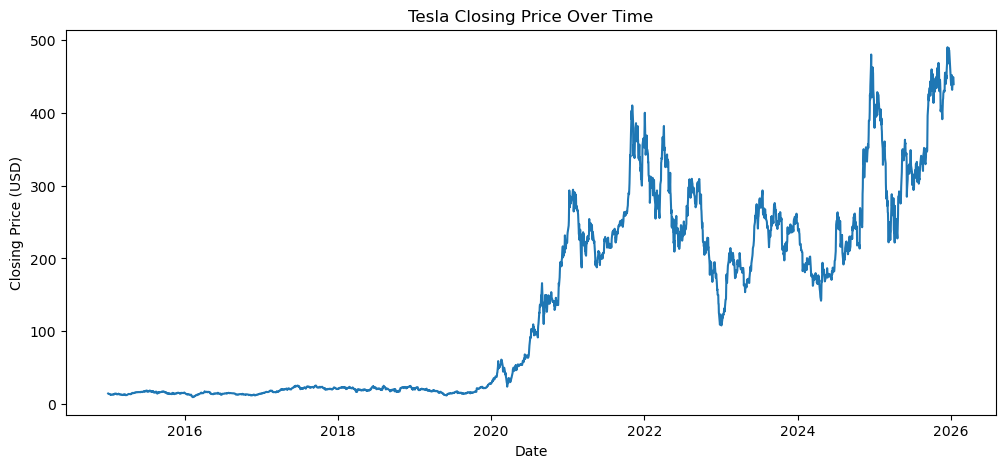

In [10]:
plt.figure(figsize=(12, 5))
plt.plot(tsla["Date"], tsla["Close"])
plt.title("Tesla Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.show()

## 📈 Tesla Closing Price Over Time – Interpretation

The plot illustrates the historical closing price of Tesla (TSLA) from approximately **2015 to 2025**, highlighting several important trends and patterns:

### 🔍 Key Observations

- **Long-Term Upward Trend**  
  Tesla’s stock price demonstrates a strong overall upward trajectory, indicating substantial long-term growth and increasing investor confidence.

- **Low Volatility (2015–2019)**  
  During the early years, the stock price remained relatively stable, trading within a narrow range with limited volatility.

- **Rapid Growth Phase (2020–2021)**  
  A sharp acceleration in price is observed starting in 2020, reflecting strong market momentum, increased adoption of electric vehicles, and positive company performance.

- **High Volatility Periods (2021–2024)**  
  Significant price fluctuations appear after 2021, suggesting heightened market sensitivity to earnings reports, macroeconomic conditions, and broader market uncertainty.

- **Recent Recovery and Growth (2024–2025)**  
  The most recent data shows a renewed upward movement, indicating potential recovery and sustained investor optimism.

### 📌 Conclusion

Overall, Tesla’s closing price exhibits **strong growth with periods of pronounced volatility**.  
This behavior suggests that while the stock offers high return potential, it also carries elevated risk—making it suitable for investors with a higher risk tolerance.


📊  Daily Percentage Change (Returns)

Observe volatility

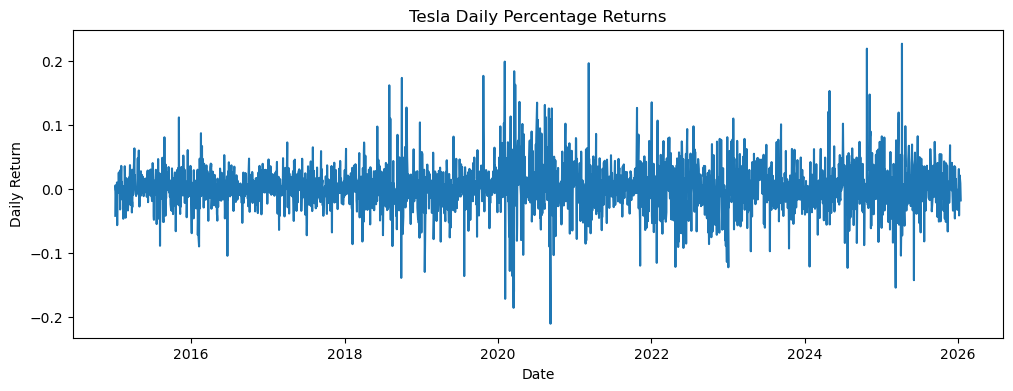

In [11]:
tsla["Daily_Return"] = tsla["Close"].pct_change()

plt.figure(figsize=(12, 4))
plt.plot(tsla["Date"], tsla["Daily_Return"])
plt.title("Tesla Daily Percentage Returns")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.show()

# Tesla Daily Percentage Returns Analysis

The chart above shows **Tesla's daily percentage returns** over time.

### Key Observations:

1. **Daily Returns**:
   - The y-axis represents **daily returns**, calculated as the percentage change in Tesla's stock price from one day to the next.
   - Most daily returns are close to 0, indicating small daily fluctuations in stock price.

2. **Volatility**:
   - Periods of higher spikes (both positive and negative) indicate **higher volatility**.
   - Notable spikes occur around **2020**, likely due to market events affecting Tesla stock.

3. **Symmetry**:
   - Returns are roughly symmetric around 0, which is typical for daily stock returns.
   - Extreme negative and positive returns are relatively rare.

4. **Overall Trend**:
   - The chart does not show cumulative growth but **daily fluctuations**, so it is primarily useful for understanding volatility and risk.

### Conclusion:

This chart is a useful visualization for **investors and analysts** to understand Tesla's daily price variability and risk over time. Sudden spikes may require further investigation into specific events that impacted the stock.

📉 Rolling Mean & Volatility (Std Dev)

Short-term trends & fluctuations

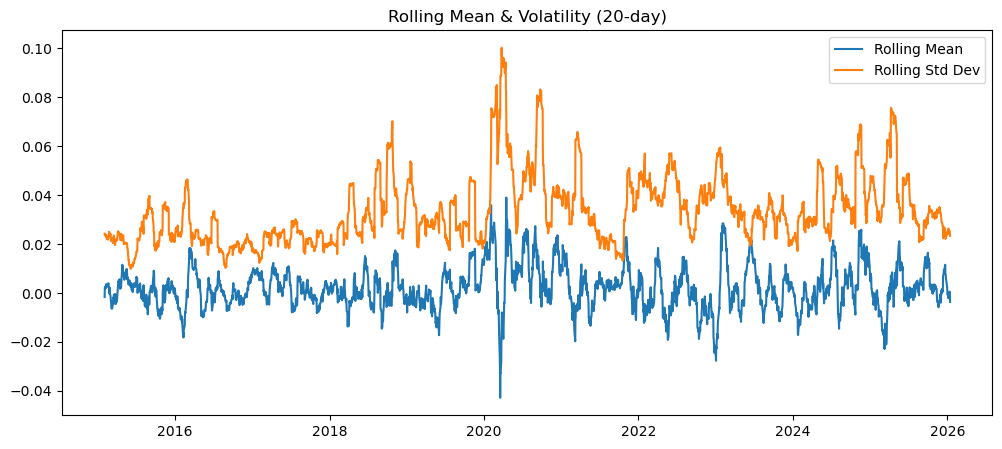

In [12]:
window = 20  # ~1 trading month

tsla["Rolling_Mean"] = tsla["Daily_Return"].rolling(window).mean()
tsla["Rolling_Std"] = tsla["Daily_Return"].rolling(window).std()

plt.figure(figsize=(12, 5))
plt.plot(tsla["Date"], tsla["Rolling_Mean"], label="Rolling Mean")
plt.plot(tsla["Date"], tsla["Rolling_Std"], label="Rolling Std Dev")
plt.title("Rolling Mean & Volatility (20-day)")
plt.legend()
plt.show()

## Rolling Mean & Rolling Volatility (20-Day Window)

This chart visualizes two key rolling statistics computed over a **20-day window** (approximately one trading month):

- **Rolling Mean (Blue Line)**  
- **Rolling Standard Deviation / Volatility (Orange Line)**  

These metrics are commonly used in **financial time series analysis**, especially for returns.

---

## 1. Rolling Mean (Blue Line)

The rolling mean represents the **average return over the past 20 days** at each point in time.

### What it shows:
- It fluctuates around **zero**, which is typical for asset returns.
- Short-term **positive spikes** indicate brief bullish momentum.
- **Negative dips** reflect short-term bearish periods.
- A sharp negative drop around **early 2020** suggests a sudden market shock.

### Interpretation:
- The rolling mean captures **short-term trends**, not long-term direction.
- Since it frequently crosses zero, the market does not exhibit a persistent bias upward or downward.
- Large deviations from zero usually coincide with **high-volatility periods**.

---

## 2. Rolling Volatility (Orange Line)

The rolling standard deviation measures how much returns **vary** over the last 20 days.

### What it shows:
- Volatility is **time-varying**, not constant.
- Major volatility spikes appear around **2020**, indicating extreme uncertainty.
- Elevated volatility persists during later periods, though less extreme.
- Quieter periods (lower volatility) dominate before 2018.

### Interpretation:
- High volatility = **higher risk and uncertainty**
- Low volatility = **more stable market conditions**
- Volatility clustering is visible: high-volatility periods tend to group together.

---

## 3. Relationship Between Mean and Volatility

- Large movements in the rolling mean often occur **during high volatility**.
- Volatility tends to spike **before or during major market moves**, not after.
- This confirms a classic financial pattern:  
  **“Returns are unpredictable, but volatility is persistent.”**

---

## 4. Key Takeaways

- The market exhibits **no stable short-term mean**, reinforcing the difficulty of timing returns.
- Volatility is **regime-based**, with calm and turbulent phases.
- The 2020 period stands out as a **structural break / crisis event**.
- Rolling statistics help reveal **hidden dynamics** that raw returns do not show.

---

## 5. Why This Matters

Rolling mean and volatility are used for:
- Risk management
- Trading strategies (e.g., volatility targeting)
- Regime detection (calm vs. stressed markets)
- Portfolio allocation decisions

They provide **local, time-aware insights** instead of global averages.


Visualize outliers

In [14]:
mean = tsla["Daily_Return"].mean()
std = tsla["Daily_Return"].std()

outliers = tsla[
    (tsla["Daily_Return"] > mean + 3 * std) |
    (tsla["Daily_Return"] < mean - 3 * std)
]

outliers[["Date", "Daily_Return"]].head()

,Date,Daily_Return
212,2015-11-04,0.111735
902,2018-08-02,0.161880
942,2018-09-28,-0.139015
943,2018-10-01,0.173471
959,2018-10-23,0.127189


Visualize outliers

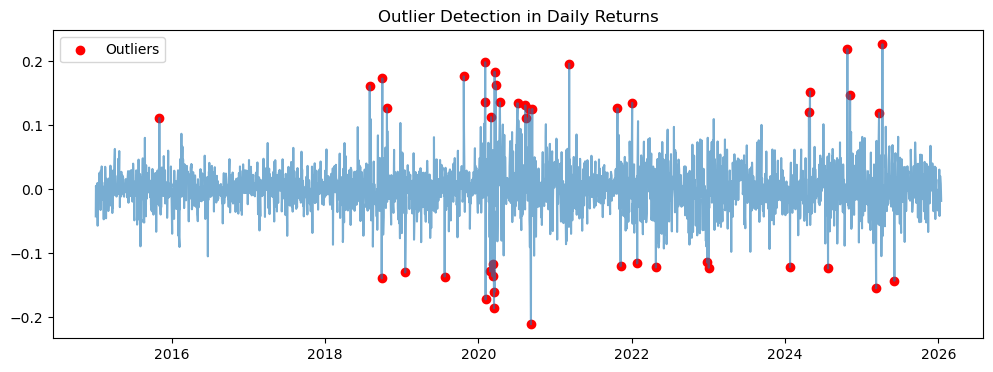

In [15]:
plt.figure(figsize=(12, 4))
plt.plot(tsla["Date"], tsla["Daily_Return"], alpha=0.6)
plt.scatter(outliers["Date"], outliers["Daily_Return"], color="red", label="Outliers")
plt.title("Outlier Detection in Daily Returns")
plt.legend()
plt.show()

4️⃣ Seasonality & Trend Analysis (Stationarity)

📐 Augmented Dickey-Fuller (ADF) Test

In [16]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series, name):
    result = adfuller(series.dropna())
    print(f"ADF Test for {name}")
    print(f"Test Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    print("-" * 40)

adf_test(tsla["Close"], "Closing Price")
adf_test(tsla["Daily_Return"], "Daily Returns")

ADF Test for Closing Price
Test Statistic: -0.7802
p-value: 0.8249
----------------------------------------
ADF Test for Daily Returns
Test Statistic: -53.0196
p-value: 0.0000
----------------------------------------


## Augmented Dickey-Fuller (ADF) Test Results

The Augmented Dickey-Fuller (ADF) test is used to determine whether a time series is **stationary** or **non-stationary**.  
Stationarity is a key assumption in many time-series and financial models.

---

## 1. ADF Test for Closing Price

**Test Statistic:** -0.7802  
**p-value:** 0.8249  

### Interpretation:
- The p-value is **much greater than 0.05**
- We **fail to reject** the null hypothesis of a unit root
- This indicates that the **closing price series is non-stationary**

### What this means:
- The price level follows a **random walk**
- It contains trends and long-term dependence
- Statistical properties (mean, variance) change over time
- Direct modeling of prices can lead to **spurious results**

---

## 2. ADF Test for Daily Returns

**Test Statistic:** -53.0196  
**p-value:** 0.0000  

### Interpretation:
- The p-value is **far below 0.05**
- We **reject** the null hypothesis of a unit root
- This confirms that the **daily return series is stationary**

### What this means:
- Returns fluctuate around a constant mean (near zero)
- Variance is relatively stable over time
- Returns are suitable for **time-series modeling and forecasting**

---

## 3. Comparison Summary

| Series           | Stationary? | Explanation |
|------------------|-------------|-------------|
| Closing Price    | ❌ No        | Price levels evolve over time and contain trends |
| Daily Returns    | ✅ Yes       | Differencing removes trends and stabilizes variance |

---

## 4. Key Takeaways

- Financial **prices are typically non-stationary**
- **Returns (first differences of log prices)** are stationary
- This validates the common practice of modeling **returns instead of prices**
- Stationarity of returns supports models such as:
  - ARIMA (on returns)
  - GARCH (volatility modeling)
  - Risk and portfolio analysis

---

## 5. Practical Implication

Before applying statistical or machine learning models:
- ❌ Avoid using raw prices directly
- ✅ Use returns or differenced series to satisfy stationarity assumptions

This ADF test result confirms that your data behaves **exactly as expected for financial markets**.


 Risk Metrics
 
Value at Risk (VaR – Historical)

In [17]:
confidence_level = 0.05
VaR_95 = np.percentile(tsla["Daily_Return"].dropna(), confidence_level * 100)

print(f"95% Historical VaR: {VaR_95:.4f}")

95% Historical VaR: -0.0525


📈  Sharpe Ratio (Historical)

In [18]:
risk_free_rate = 0.0  # daily risk-free rate assumed 0

mean_return = tsla["Daily_Return"].mean()
std_return = tsla["Daily_Return"].std()

sharpe_ratio = (mean_return - risk_free_rate) / std_return

print(f"Sharpe Ratio: {sharpe_ratio:.3f}")

Sharpe Ratio: 0.052


## Risk and Performance Metrics Interpretation

This section explains the meaning of the **95% Historical Value at Risk (VaR)** and the **Sharpe Ratio** computed from the return series.

---

## 1. 95% Historical Value at Risk (VaR)

**95% Historical VaR:** **-0.0525**

### Interpretation:
- At the **95% confidence level**, the **worst expected daily loss** is **5.25%**
- This means that on **95 out of 100 days**, losses should **not exceed 5.25%**
- On the remaining **5% of days**, losses may be **worse than -5.25%**

### What this tells us:
- The asset carries **meaningful downside risk**
- Large negative returns, while infrequent, are possible
- This measure is **non-parametric** and based purely on historical data

### Important limitation:
- Historical VaR does **not predict extreme tail losses**
- It assumes the future risk profile resembles the past

---

## 2. Sharpe Ratio

**Sharpe Ratio:** **0.052**

### Interpretation:
- The Sharpe Ratio measures **risk-adjusted return**
- A value of **0.052** is **very low**

### What this tells us:
- The asset delivers **minimal excess return per unit of risk**
- Volatility is not sufficiently compensated by returns
- From a performance standpoint, the investment is **inefficient**

### Common benchmarks:
| Sharpe Ratio | Interpretation |
|-------------|----------------|
| < 0.5       | Poor           |
| 0.5 – 1.0   | Acceptable     |
| 1.0 – 2.0   | Good           |
| > 2.0       | Excellent      |

---

## 3. Combined Risk–Return Perspective

- **High downside risk** (VaR = -5.25%)
- **Low risk-adjusted performance** (Sharpe ≈ 0)
- The asset exhibits **risk without adequate reward**

---

## 4. Key Takeaways

- The portfolio/asset is **exposed to significant losses**
- Expected returns are **too small relative to volatility**
- Suitable primarily for:
  - Short-term speculation
  - Diversification (not standalone investment)
- Not attractive for **risk-averse investors**

---

## 5. Practical Implications

To improve risk-adjusted performance:
- Diversify with low-correlation assets
- Apply volatility targeting or position sizing
- Combine with assets having higher Sharpe Ratios
- Consider downside-risk measures (e.g., CVaR)

These metrics provide a **concise snapshot of both risk and performance**.
